<a href="https://colab.research.google.com/github/priscilla1812/Pima-Indian-Diabetes-Prediction/blob/main/Grid_Search_Transformer_PIMA_Diabetes_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Type 2 Diabetes Prediction using Pima Indians Diabetes Dataset***

**Inspiration**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

**Content:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Dataset Description:**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skinfold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.

Age: Age in years

Outcome: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [ ]:
# Import the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Diabetes Prediction/diabetes.csv")

# View the top 5 rows of df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# View the dimensions of df
df.shape

(768, 9)

## Data Processing

In [ ]:
# View dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# View descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Pregnancies appear in a realistic range from 0 to 17.

* The 'DiabetesPedigreeFunction' is a function that scores the probability of diabetes based on family history, with a realistic range of 0.08 to 2.42. Age has a realistic range from 21 to 81.
* The Outcome, in the target variable, 0 represents healthy people, and 1 represents those with diabetes.

* Some other attributes in the data (Glucose, BloodPressure, SkinThickness, Insulin, BMI) include the value 0, which is not possible in practice. In this case, the impossible 0 values need to be corrected.

* All impossible values were corrected by replacing them with mean values at the pre-processing stage.


In [ ]:
# Checking for null values
# df.isnull() return True for missing values and False for non-missing values.
df.isnull().sum().sum() # returns the number of missing values in the dataset.
# df.isnull().values.any() # returns True when there is at least one missing value occurring in the data.

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

The number of duplicated values is 0

## Checking for values that are 0 in the dataset

In [ ]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print("No. of zero values in Blood Pressure column : ", df[df['BloodPressure']==0].shape[0])
print("No. of zero values in Glucose column : ", df[df['Glucose']==0].shape[0])
print("No. of zero values in Skin Thickness column : ", df[df['SkinThickness']==0].shape[0])
print("No. of zero values in Insulin column : ", df[df['Insulin']==0].shape[0])
print("No. of zero values in BMI column : ", df[df['BMI']==0].shape[0])

No. of zero values in Blood Pressure column :  35
No. of zero values in Glucose column :  5
No. of zero values in Skin Thickness column :  227
No. of zero values in Insulin column :  374
No. of zero values in BMI column :  11


## EDA

Observing Outliers

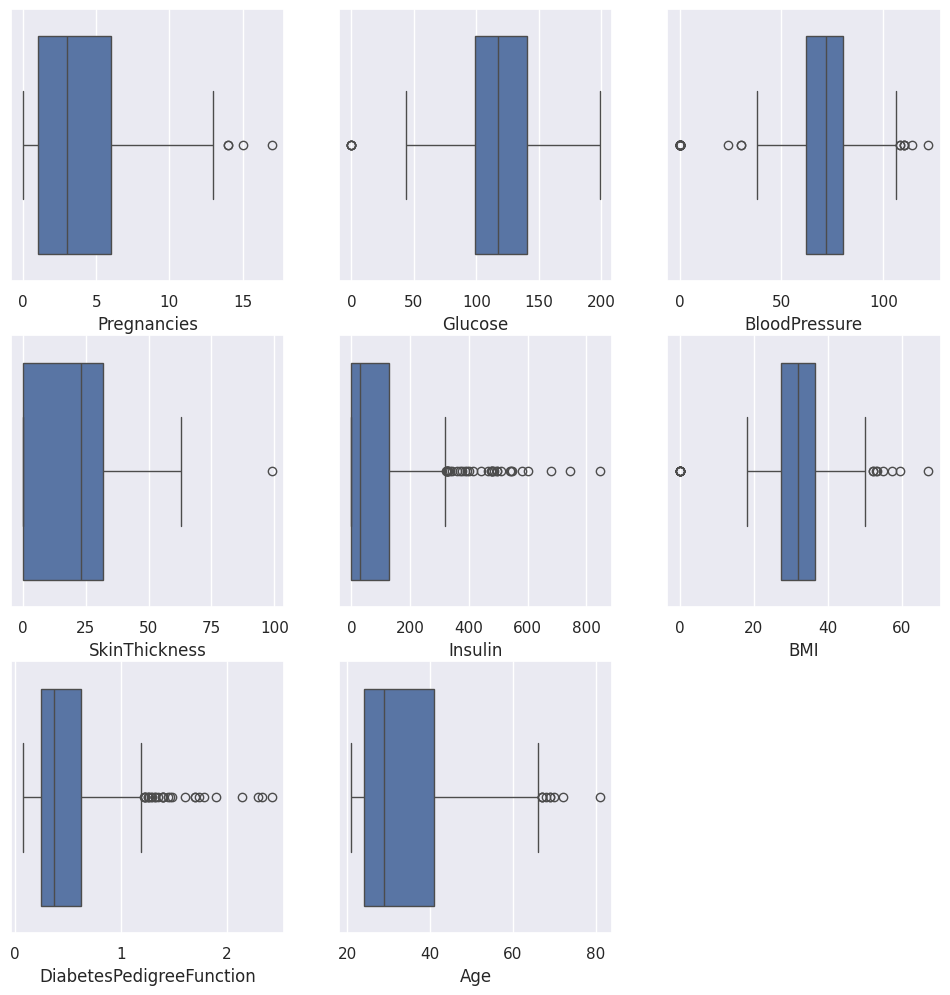

In [ ]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = df)
plt.show()

## Visualization of Target Variable

array([<Axes: title={'center': 'Pie Chart'}, ylabel='count'>],
      dtype=object)

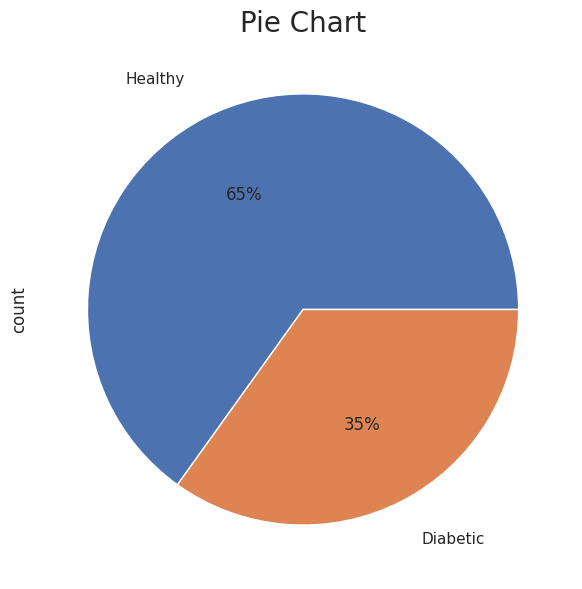

In [ ]:
# Use seaborn style with set_theme
sns.set_theme(style="darkgrid")  # or any other seaborn style like "whitegrid", "dark", "ticks"
labels = ["Healthy", "Diabetic"]
plt.figure(figsize=(10,7))
plt.title('Pie Chart', fontsize=20)
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

Samples of diabetic people:  268
Samples of healthy people:  500


<ipython-input-442-a5935940f637>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Healthy", "Diabetic"])


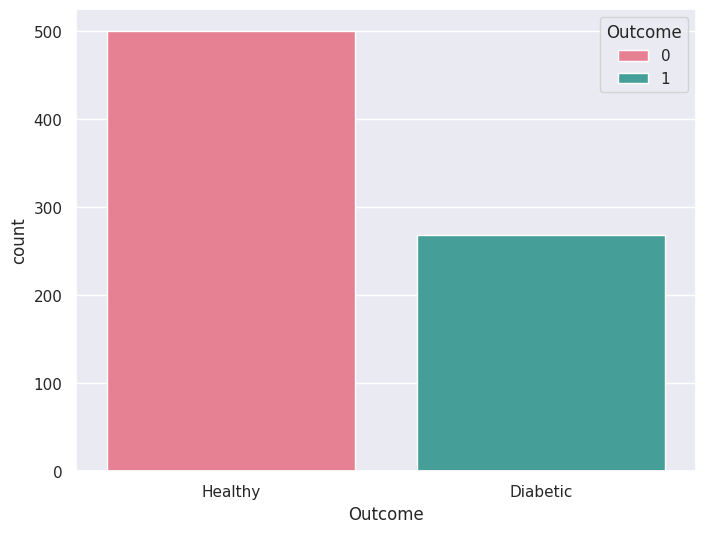

In [ ]:
from matplotlib.pyplot import figure, show
figure(figsize=(8,6))
ax = sns.countplot(x=df['Outcome'], data=df,palette="husl", hue="Outcome")
ax.set_xticklabels(["Healthy", "Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values
print("Samples of diabetic people: ", diabetics)
print("Samples of healthy people: ", healthy)

## Distribution of other features with respect to Outcome

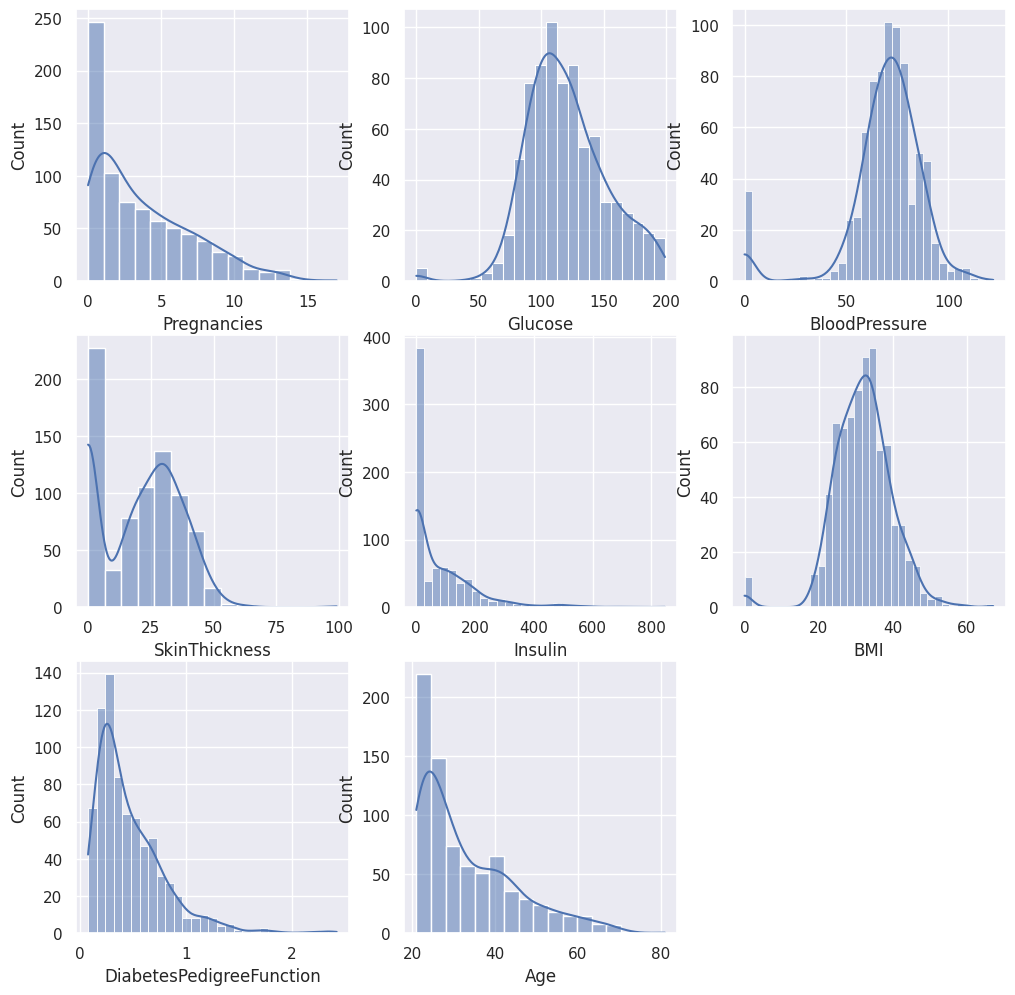

In [ ]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = df, kde = True)
plt.show()

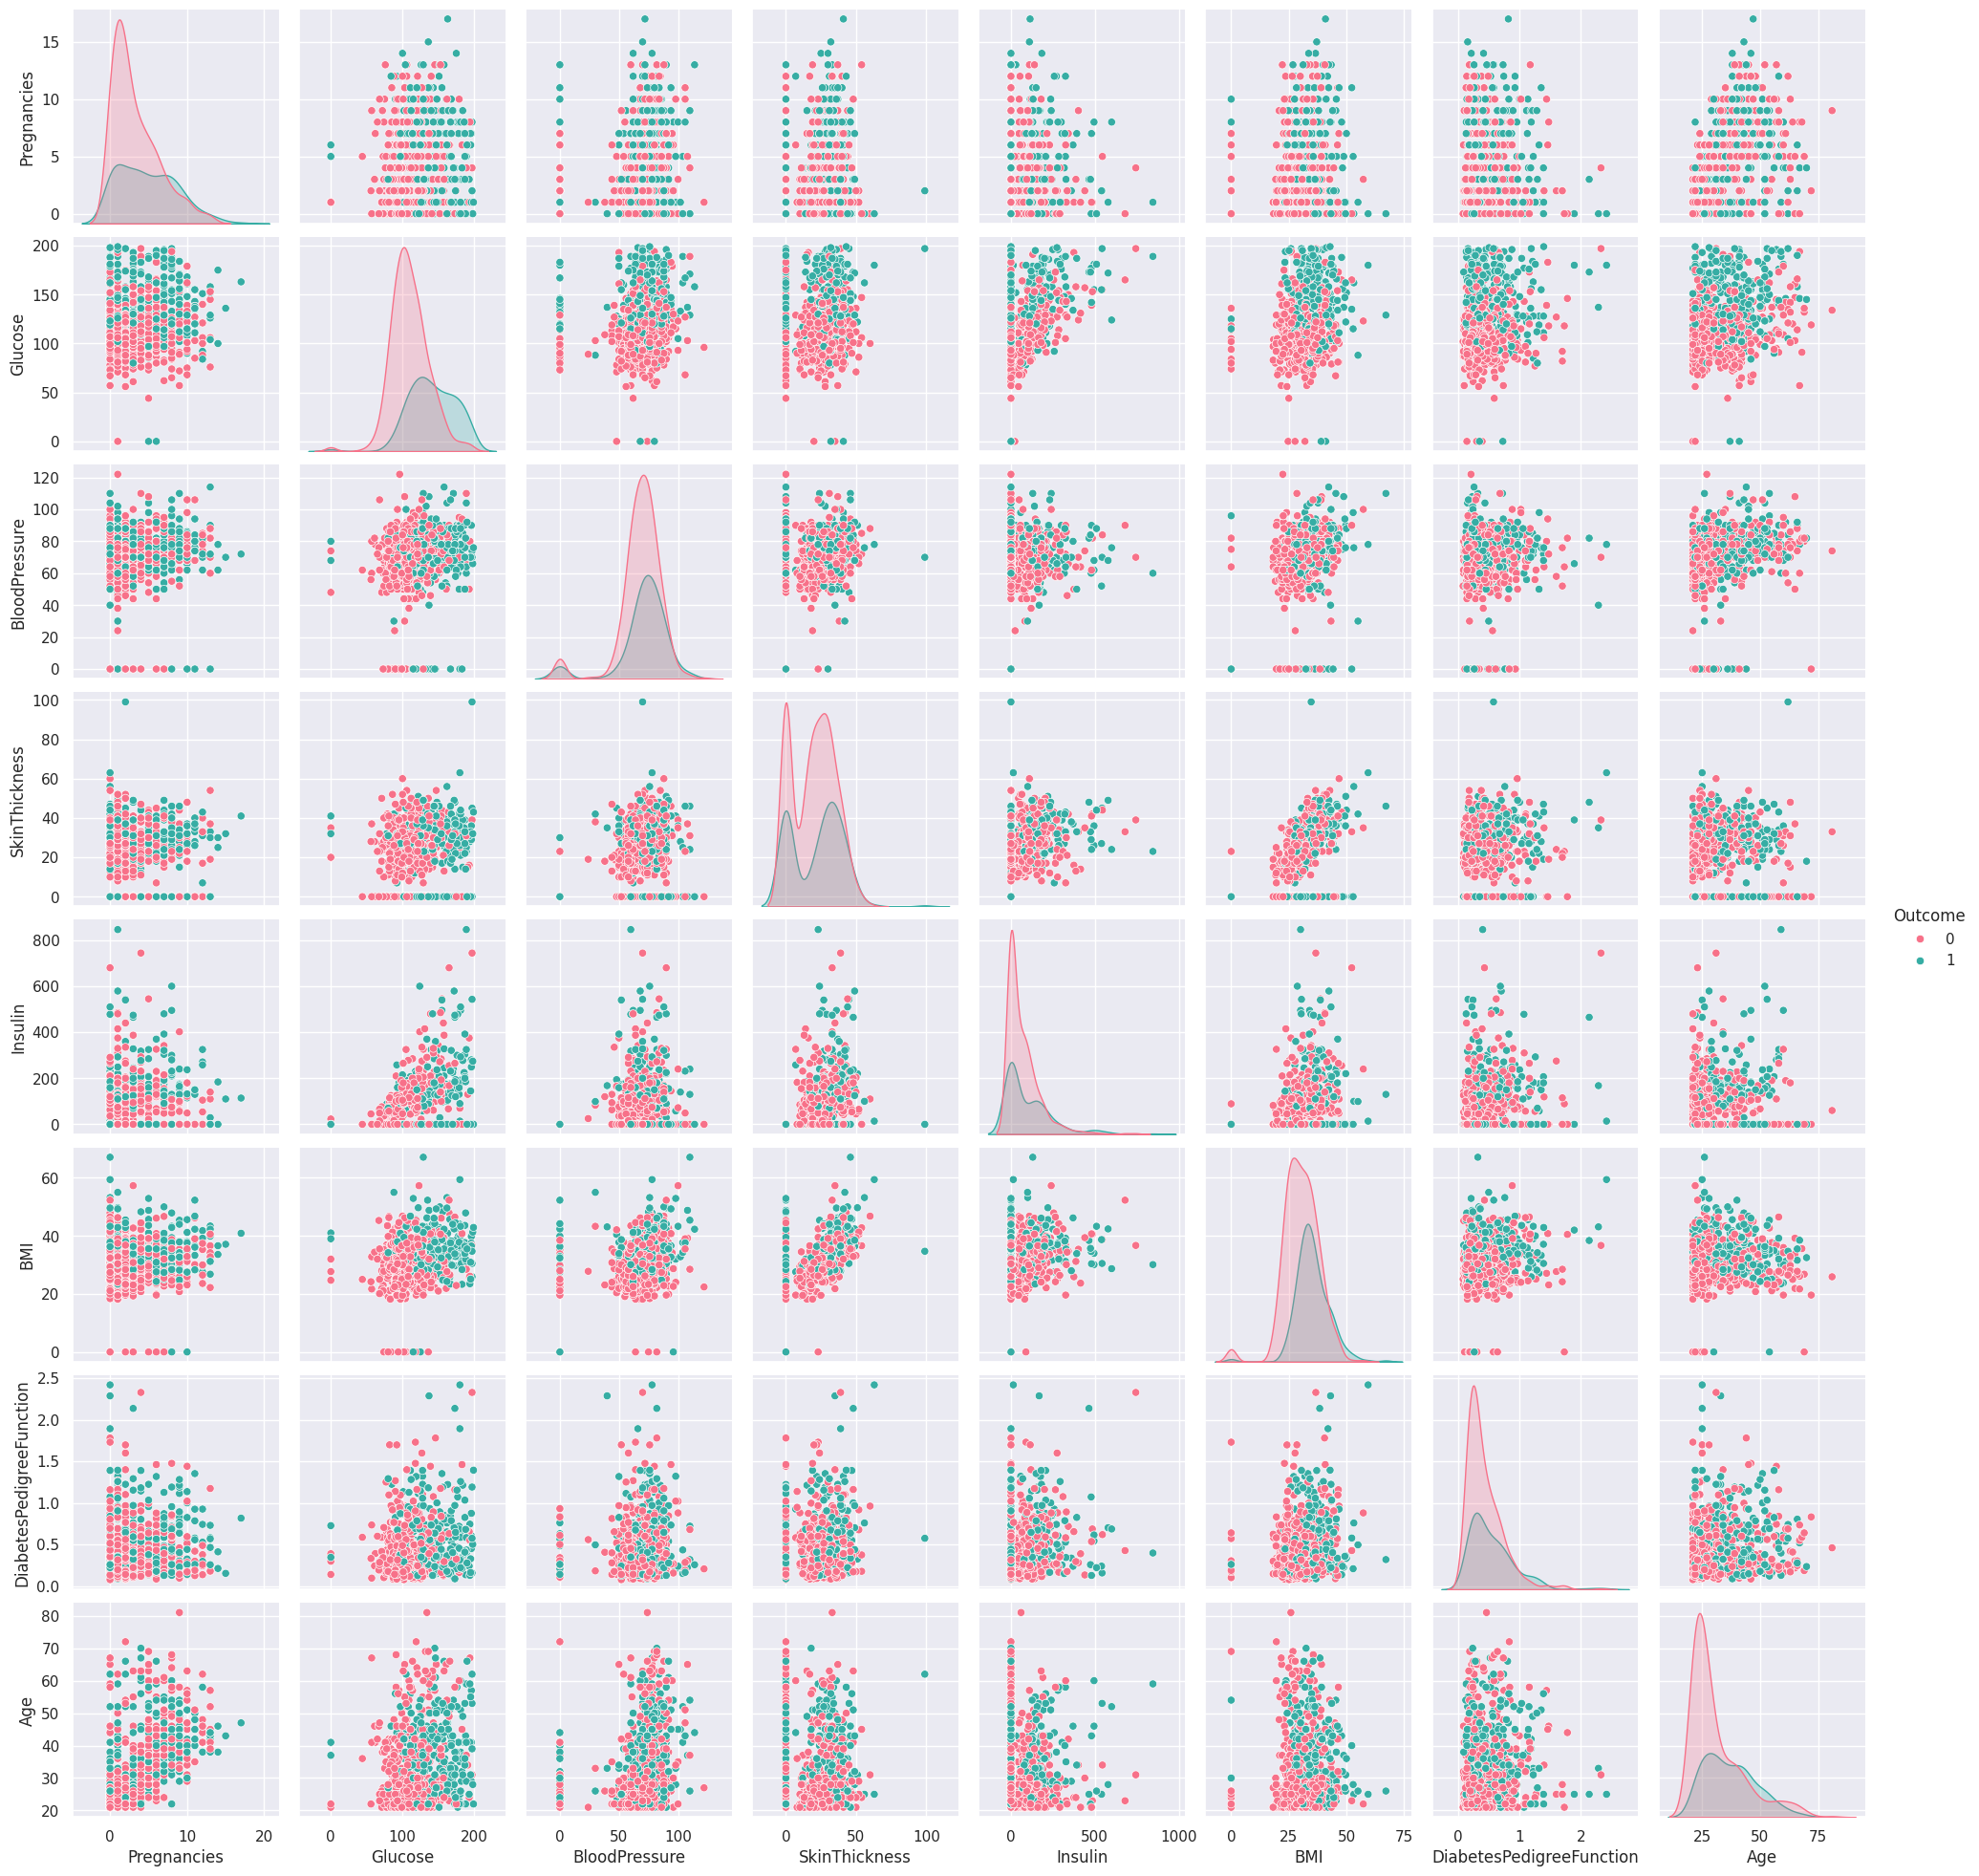

In [ ]:
sns.pairplot(df, hue="Outcome", palette="husl")

## Correlation Matrix using Heat map

Finding the correlation between the features/attributes in the dataset

***Feature Selection Method: Correlation Matrix with Heatmap***

Pearson's Correlation Coefficient : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

Text(0.5, 1.0, 'Heat Map')

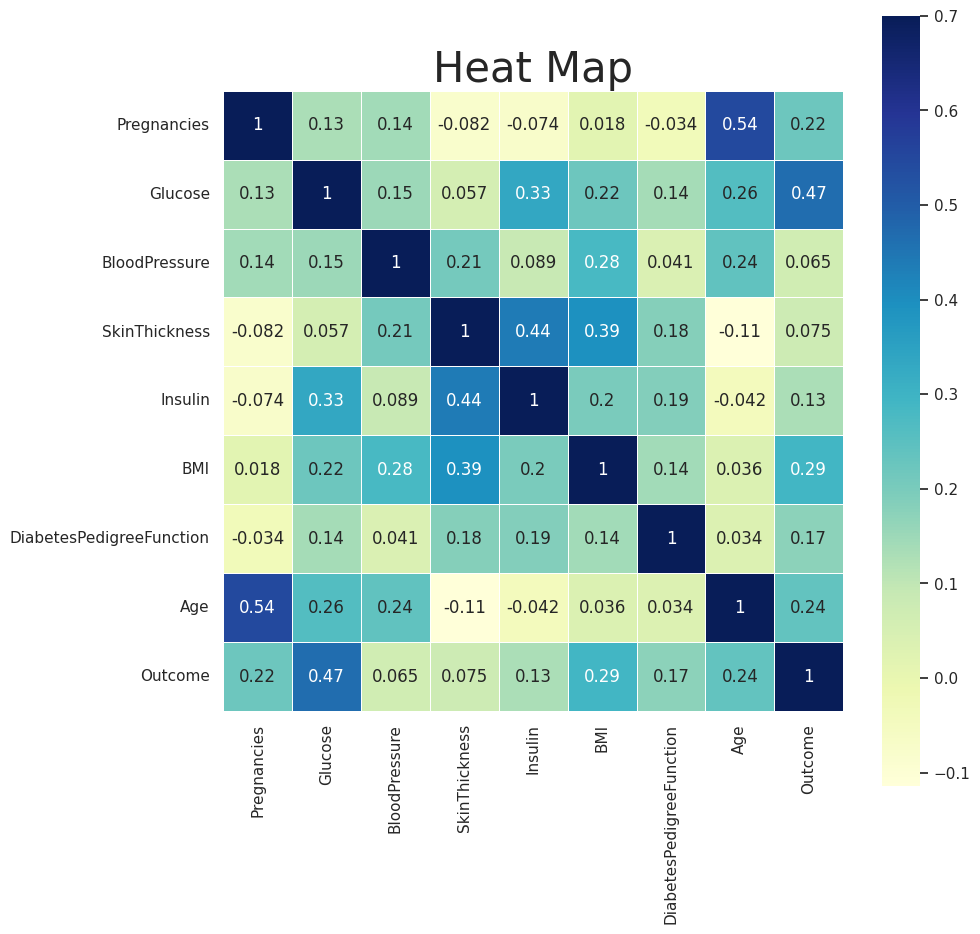

In [ ]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, vmax=.7, square=True, cmap="YlGnBu",annot=True,linewidths=.5); #.set_title('Heat Map',fontsize=20);
plt.title('Heat Map', fontsize=30)

CONCLUSION :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, SkinThickness are the least correlated, hence they don't contribute much to the model so we can drop them.

**Glucose is the best indicator of diabetes outcome in this situation.**

It is seen that with strongly correlated features, the target class can be predicted more easily, and more meaningful results can be drawn.

## Class Imbalance

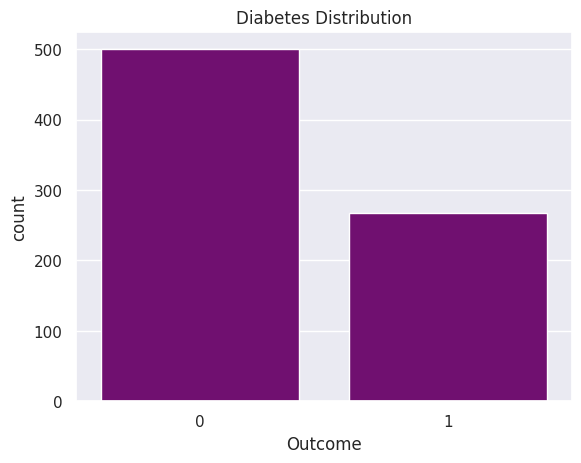

In [ ]:
# Count plot for the 'Outcome' variable
sns.countplot(x='Outcome', data=df, color = "purple")
plt.title('Diabetes Distribution')
plt.show()

## Handling Outliers

**1 — What is an Outlier?**

An outlier is a data point in a data set that is distant from all other observations.

**2 — How can we Identify an outlier?**

- Using Box plots

- Using Scatter plot

- Using Z score

I've used Box Plots above in data visualization step to detect outliers.

**3 — How am I treating the outliers ?**

*Quantile Transformer Scaler:-* This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

*Min Max Scaler -> Normalization*

Normalization scales data to a set range, often [0, 1], by using the minimum and maximum values.

*Standard Scaler -> Standardization*

Standardization centers data around a mean of zero and a standard deviation of one.

*Robust Scaler*

*Label Encoding -> only for categorical data, not numeric data*

Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. It is particularly useful when working with algorithms that require numerical input, as most machine learning models can only operate on numerical data.

*One Hot Encoding*

The best approach is often to experiment with both options and see which one works best for your specific dataset and machine learning problem.
Compare the validation scores of your model when using each scaler and choose the one that gives the best results.
If you have a lot of outliers in your data, you may want to use the RobustScaler instead of these two.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import QuantileTransformer
quantile  = QuantileTransformer()
dfpima=df.drop('Outcome',axis='columns')
# calculate median and IQR
quantile.fit(dfpima)
dfq = quantile.transform(dfpima)
df_scaled=pd.DataFrame(dfq)
df_scaled.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_scaled.head()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258


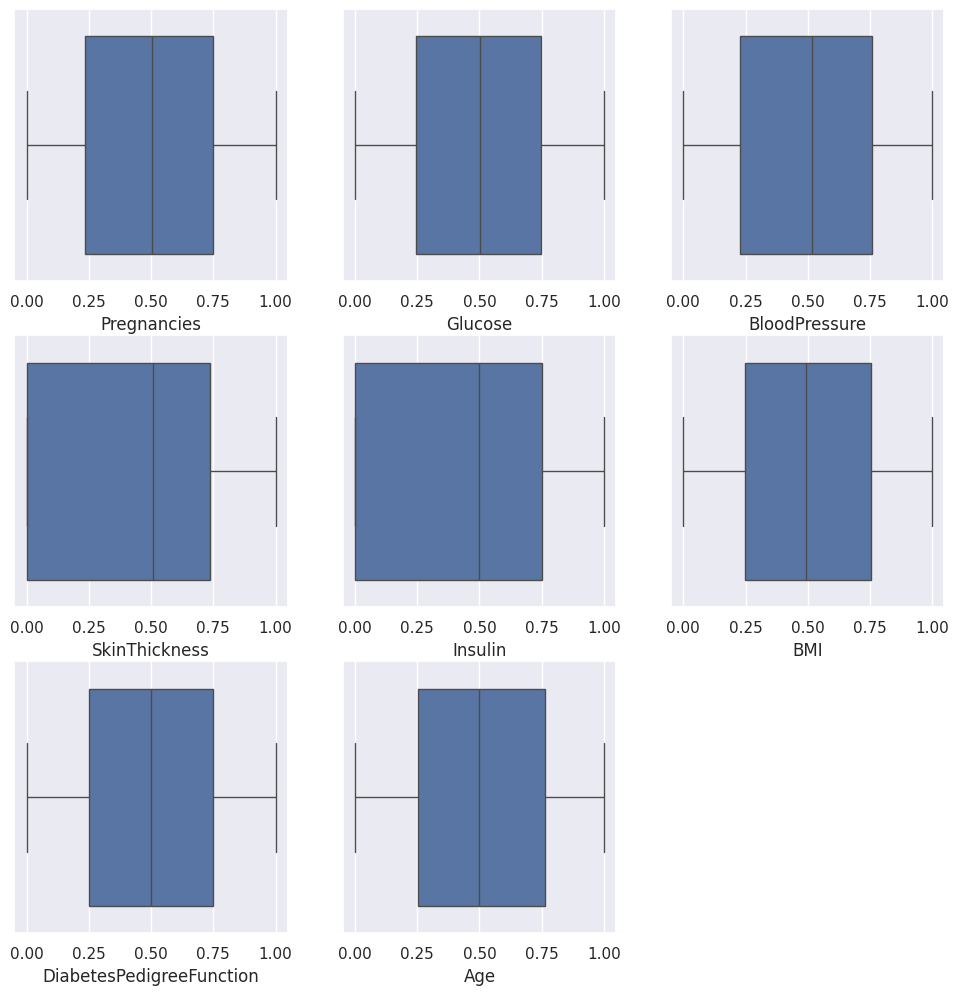

In [ ]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = df_scaled)
plt.show()

## Splitting the data into training data and testing data

In [ ]:
x= df.drop(['Outcome'], axis=1) # dropping the Outcome column and keeping all other columns as x
y= df['Outcome'] # target variable

In [ ]:
x.head() # contains only independent features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head() #contains dependent feature

,Outcome
0,1
1,0
2,1
3,0
4,1


## Removing the value 0 from the dataset using Mean Strategy

The following can be seen as standard guideline for using mean, median or mode for replacing the missing values:

**Mean imputation** is often used when the missing values are numerical and the distribution of the variable is approximately normal.

**Median imputation** is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

**Mode imputation** is suitable for categorical variables or numerical variables with a small number of unique values.

Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values.

In [ ]:
from sklearn.impute import SimpleImputer
fill=SimpleImputer(missing_values=0,strategy="mean") # median
x=fill.fit_transform(x)

## Resolving Class Imbalance in Target Variable

In [ ]:
!pip install imblearn

In [ ]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(x, y)

print("Before OverSampling, counts of label '1' in y: {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0' in y: {} \n".format(sum(y == 0)))

print('After OverSampling, the shape of x: {}'.format(x_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1' in y: {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0' in y: {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1' in y: 268
Before OverSampling, counts of label '0' in y: 500 

After OverSampling, the shape of x: (1000, 8)
After OverSampling, the shape of y: (1000,) 

After OverSampling, counts of label '1' in y: 500
After OverSampling, counts of label '0' in y: 500


SMOTE over-sampling:
Outcome
1    500
0    500
Name: count, dtype: int64


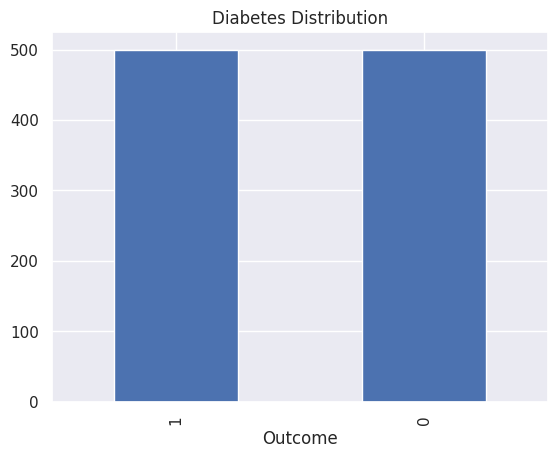

In [ ]:
df_smote_over = pd.DataFrame(y_res, columns=['Outcome'])

print('SMOTE over-sampling:')
print(df_smote_over.Outcome.value_counts())

df_smote_over.Outcome.value_counts().plot(kind='bar', title='Diabetes Distribution');

## TRAIN TEST SPLIT

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

Split percentages: Train: 80%, Test: 20%

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0) # random_state=42

## Model Preparation

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

## 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000,random_state=42)
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
lrscore = lr.score(x_test,y_test)

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[:, 1]
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:\n')
print(lr.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred1))
print(lr.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(lr.__class__.__name__+" auc is %2.3f" % auc(fpr1, tpr1))

Train/Test split results:

LogisticRegression basic accuracy is 0.740
LogisticRegression log_loss is 0.499
LogisticRegression auc is 0.829


In [ ]:
print("Logistic Regression accuracy: ", metrics.accuracy_score(y_test, y_pred1))

Logistic Regression accuracy:  0.7402597402597403


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       157
           1       0.59      0.62      0.61        74

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



## 2) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

- `estimator`: The Random Forest model (`rf`).
- `param_grid`: The dictionary of hyperparameters.
- `cv`: The number of cross-validation folds (5 in this case).
- `scoring`: The metric to evaluate the model's performance (accuracy here).

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.7653513326410522


In [ ]:
rf = RandomForestClassifier(**best_params)  # Use best_params from GridSearchCV

In [ ]:
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)
rfscore = rf.score(x_test,y_test)

y_pred_proba_rf = rf.predict_proba(x_test)[:, 1]
[fpr2, tpr2, thr2] = roc_curve(y_test, y_pred_proba_rf)

print('Train/Test split result:\n')
print(rf.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred2))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_rf))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr2, tpr2))

Train/Test split result:

RandomForestClassifier basic accuracy is 0.771
RandomForestClassifier log_loss is 0.464
RandomForestClassifier auc is 0.832


In [ ]:
print("Random Forest accuracy: ", metrics.accuracy_score(y_test, y_pred2))

Random Forest accuracy:  0.7705627705627706


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.68      0.54      0.60        74

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



## 3) XGBoost Classifier

In [ ]:
# train XGB
from xgboost import XGBClassifier

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
       'n_estimators': [50, 100, 200],
       'max_depth': [3, 5, 7],
       'learning_rate': [0.01, 0.1, 0.2],
       'subsample': [0.8, 0.9, 1.0],
       'colsample_bytree': [0.8, 0.9, 1.0],
   }

* n_estimators: The number of boosting rounds (trees).
* max_depth: Maximum depth of a tree.
* learning_rate: Step size shrinkage used in update to prevents overfitting.
* subsample: Subsample ratio of the training instances.
* colsample_bytree: Subsample ratio of columns when constructing each tree.

In [ ]:
xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2)

* estimator: The XGBoost model (xgb).
* param_grid: The dictionary of hyperparameters.
* scoring: The metric to evaluate the model's performance (accuracy here).
* cv: The number of cross-validation folds (5 in this case).
* verbose: Controls the verbosity (amount of output) during the search.



In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsamp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Score: 0.7708722741433023


In [ ]:
xgb = XGBClassifier(**best_params)  # Use best_params from GridSearchCV

In [ ]:
xgb.fit(x_train, y_train)

# predict on test split
y_pred3 = xgb.predict(x_test)
XGBscore = xgb.score(x_test,y_test)

In [ ]:
y_pred_proba_xgb = xgb.predict_proba(x_test)[:, 1]
[fpr3, tpr3, thr3] = roc_curve(y_test, y_pred_proba_xgb)

print('Train/Test split result:\n')
print(xgb.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred3))
print(xgb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_xgb))
print(xgb.__class__.__name__+" auc is %2.3f" % auc(fpr3, tpr3))

Train/Test split result:

XGBClassifier basic accuracy is 0.758
XGBClassifier log_loss is 0.466
XGBClassifier auc is 0.836


In [ ]:
print("XGB accuracy: ", metrics.accuracy_score(y_test, y_pred3))

XGB accuracy:  0.7575757575757576


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.64      0.55      0.59        74

    accuracy                           0.76       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



## 4) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
       'criterion': ['gini', 'entropy'],
       'max_depth': [None, 5, 10, 15, 20],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4]
   }

dt = DecisionTreeClassifier(random_state=42) # Setting random_state for reproducibility

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                                  scoring='accuracy', cv=5, verbose=2)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.7187608168916582


In [ ]:
dt = DecisionTreeClassifier(**best_params, random_state=42)  # Use best_params
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

In [ ]:
y_pred4 = dt.predict(x_test)
dtscore = dt.score(x_test,y_test)

y_pred_proba_dt = dt.predict_proba(x_test)[:, 1]
[fpr4, tpr4, thr4] = roc_curve(y_test, y_pred_proba_dt)

print('Train/Test split result:\n')
print(dt.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred4))
print(dt.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_dt))
print(dt.__class__.__name__+" auc is %2.3f" % auc(fpr4, tpr4))

Train/Test split result:

DecisionTreeClassifier basic accuracy is 0.736
DecisionTreeClassifier log_loss is 1.823
DecisionTreeClassifier auc is 0.783


In [ ]:
print("Decision Tree accuracy: ", metrics.accuracy_score(y_test, y_pred4))

Decision Tree accuracy:  0.7359307359307359


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.75      0.79       157
           1       0.57      0.72      0.63        74

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.76      0.74      0.74       231



## Algorithm Analysis

In [ ]:
from sklearn import ensemble, linear_model, tree
from sklearn import model_selection, tree, linear_model, ensemble

Model = [lr, rf, xgb, dt] #lr-Logistic Regression,rf-Random Forest Classifier, xgb-XGBoost Classifier

In [ ]:
# Creating table of algorithm stats

Model_columns = []
Model_compare = pd.DataFrame(columns = Model_columns)

row_index = 0
for alg in Model:
  predicted = alg.fit(x_train, y_train).predict(x_test)
  [fp,tp, th] = roc_curve(y_test, alg.predict_proba(x_test)[:,1])
  Model_name = alg.__class__.__name__
  Model_compare.loc[row_index, 'Model Name'] = Model_name
  Model_compare.loc[row_index, 'Model Test Accuracy'] = round(alg.score(x_test, y_test), 4)
  Model_compare.loc[row_index, 'Model Precision'] = precision_score(y_test, predicted)
  Model_compare.loc[row_index, 'Model Recall'] = recall_score(y_test, predicted)
  Model_compare.loc[row_index, 'Model Area Under ROC Curve'] = auc(fp,tp)

  row_index+=1

Model_compare.sort_values(by = ['Model Test Accuracy'], ascending = False, inplace = True)
Model_compare

,Model Name,Model Test Accuracy,Model Precision,Model Recall,Model Area Under ROC Curve
1,RandomForestClassifier,0.7619,0.666667,0.513514,0.822861
2,XGBClassifier,0.7576,0.640625,0.554054,0.836030
0,LogisticRegression,0.7403,0.589744,0.621622,0.828800
3,DecisionTreeClassifier,0.7359,0.569892,0.716216,0.782665


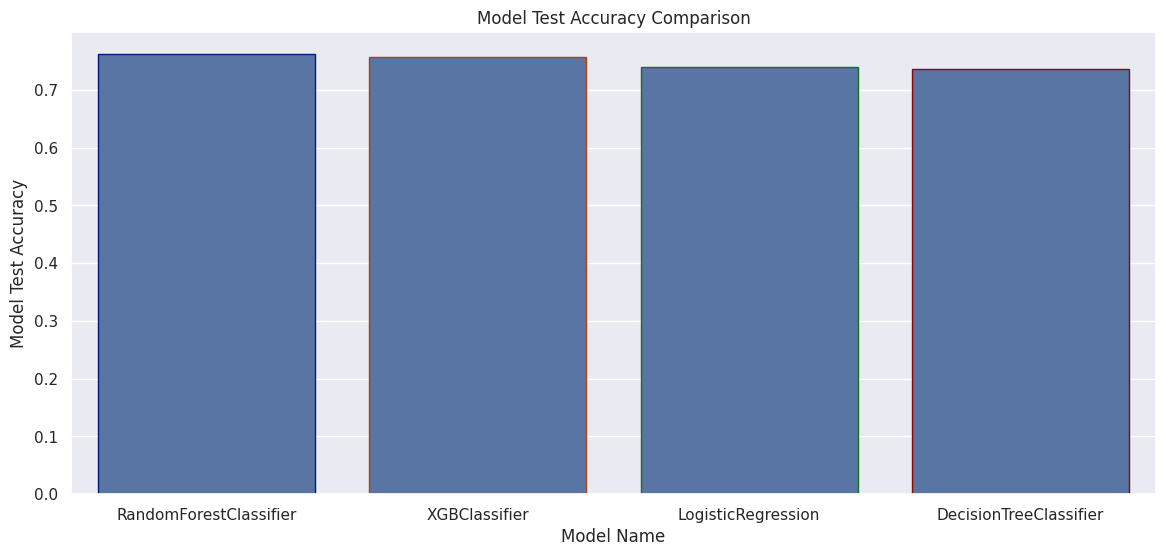

In [ ]:
# Model Test Accuracy Comparison

plt.subplots(figsize=(14,6))
sns.barplot(x="Model Name", y="Model Test Accuracy", data=Model_compare,edgecolor=sns.color_palette('dark', 7))
plt.xticks()
plt.title('Model Test Accuracy Comparison')
plt.show()

## Prediction

Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

In [ ]:
print("Expected feature names:", xgb.get_booster().feature_names)

Expected feature names: None


In [ ]:
# Make predictions on new data
'''new_data = pd.DataFrame({'gender': ['Male'], 'age': [67], 'hypertension': [0], 'heart_disease': [1], 'smoking_history': ['not current'], 'bmi': [27.32], 'HbA1c_level': [7.5], 'blood_glucose_level': [200]})
prediction = xgb.predict(new_data)
print("T2D Prediction:", prediction)
if prediction == 1:
  print("You Have Type 2 Diabetes" )
else:
  print("No, You Don't Have Type 2 Diabetes")'''

'new_data = pd.DataFrame({\'gender\': [\'Male\'], \'age\': [67], \'hypertension\': [0], \'heart_disease\': [1], \'smoking_history\': [\'not current\'], \'bmi\': [27.32], \'HbA1c_level\': [7.5], \'blood_glucose_level\': [200]})\nprediction = xgb.predict(new_data)\nprint("T2D Prediction:", prediction)\nif prediction == 1:\n  print("You Have Type 2 Diabetes" )\nelse:\n  print("No, You Don\'t Have Type 2 Diabetes")'

## Confusion Matrix

* A confusion matrix is a table that is used to define the performance of a classification algorithm.
* It visualizes and summarizes the performance of a classification algorithm.

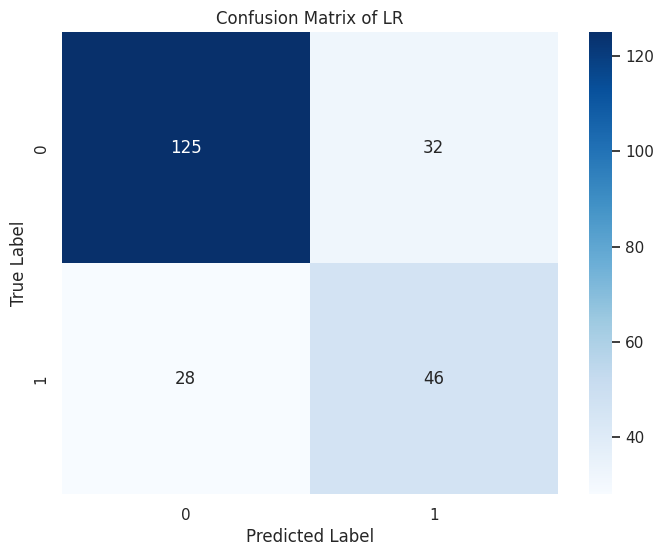

In [ ]:
# Confusion Matrix of LR
from sklearn.metrics import confusion_matrix

# y_pred1 = lr.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of LR')
plt.show()

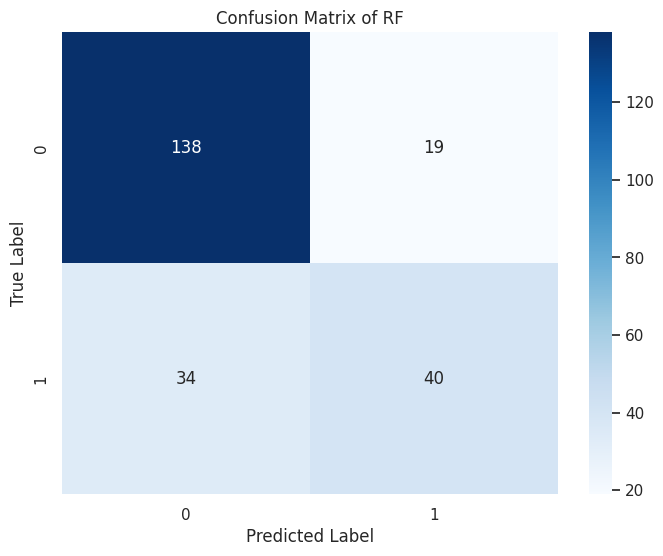

In [ ]:
# Confusion Matrix of RF
# y_pred2 = rf.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RF')
plt.show()

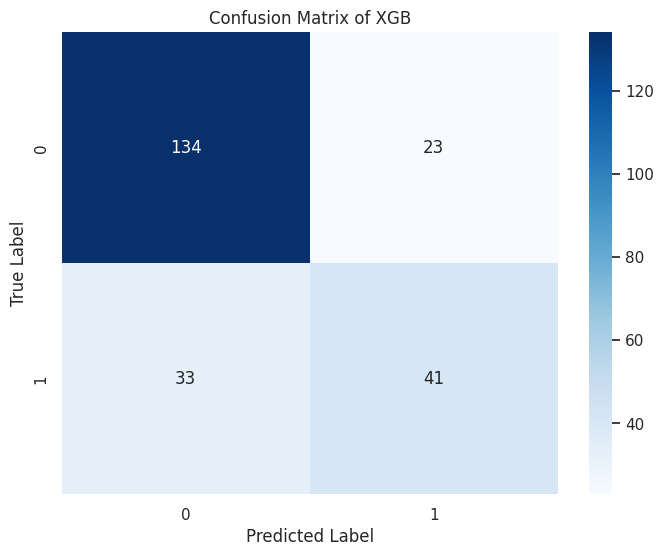

In [ ]:
# Confusion Matrix of XGB
# y_pred3 = xgb.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGB')
plt.show()

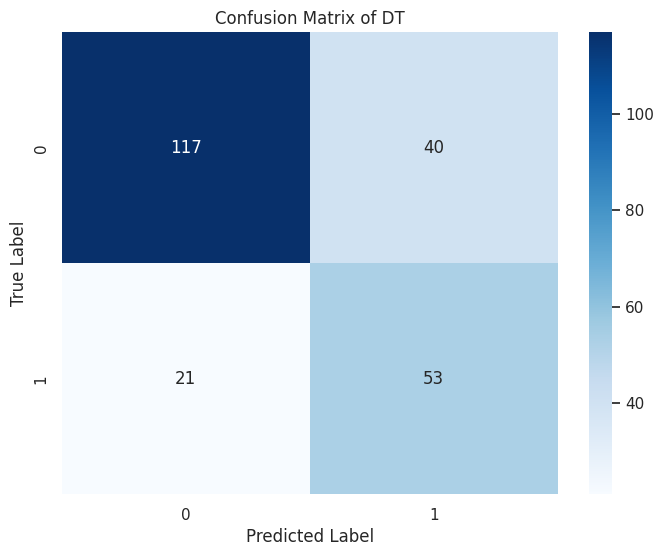

In [ ]:
# Confusion Matrix of DT
# y_pred4 = dt.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred4)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of DT')
plt.show()

## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#LR
scorelr = cross_val_score(lr,x,y,cv=10)
scorelr

array([0.7012987 , 0.77922078, 0.74025974, 0.68831169, 0.72727273,
       0.76623377, 0.75324675, 0.84415584, 0.76315789, 0.77631579])

In [ ]:
scorelr.mean()

np.float64(0.7539473684210527)

In [ ]:
#RF
scorerf = cross_val_score(rf,x,y,cv=10)
scorerf

array([0.72727273, 0.80519481, 0.74025974, 0.66233766, 0.7012987 ,
       0.77922078, 0.80519481, 0.80519481, 0.69736842, 0.82894737])

In [ ]:
scorerf.mean()

np.float64(0.7552289815447711)

In [ ]:
#XGB
scorexgb = cross_val_score(xgb,x,y,cv=10)
scorexgb

array([0.76623377, 0.80519481, 0.77922078, 0.67532468, 0.71428571,
       0.77922078, 0.79220779, 0.81818182, 0.68421053, 0.82894737])

In [ ]:
scorexgb.mean()

np.float64(0.7643028024606972)

In [ ]:
#DT
scoredt = cross_val_score(dt,x,y,cv=10)
scoredt

array([0.7012987 , 0.71428571, 0.72727273, 0.64935065, 0.68831169,
       0.75324675, 0.77922078, 0.76623377, 0.72368421, 0.77631579])

In [ ]:
scoredt.mean()

np.float64(0.7279220779220779)